# Machine Learning Survey 

#### June 06 2019
#### Author Sivarat Malapet

#### Linkedin: https://th.linkedin.com/in/sivaratmalapet
#### Github: https://github.com/smalapet/
#### Medium: https://medium.com/@SMalapet


# 1. Supervised Learning Algorithms

## 1.1 Perceptron Linear-Classifier

In [9]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import numpy as np

In [10]:
iris = datasets.load_iris()
X = iris.data[:, [2,3]]
y = iris.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [13]:
ppn = Perceptron(max_iter=40, tol=1e-3, eta0=0.1, random_state=0)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [14]:
y_pred = ppn.predict(X_test_std)
print('Misclassified samples: %d' % (y_test != y_pred).sum())
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Misclassified samples: 5
Accuracy: 0.89


<ipython-input-21-8d5f77720a28>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


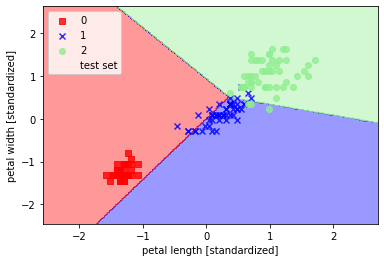

In [21]:
def plot_decision_regions(X, y, classifier,
    test_idx=None, resolution=0.02):

    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
    np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    X_test, y_test = X[test_idx, :], y[test_idx]
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
        alpha=0.8, c=cmap(idx), marker=markers[idx], label=cl)

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1], c='',
            alpha=1.0, linewidth=1, marker='o', s=55, label='test set')

X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std, y=y_combined, classifier=ppn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

## 1.2 Logistic Regression

#### Reference:
#### https://stackoverflow.com/questions/38640109/logistic-regression-python-solvers-definitions


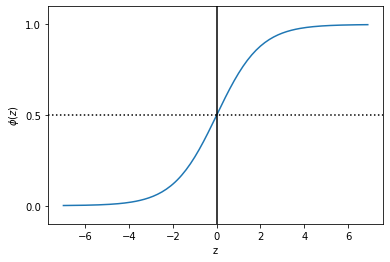

In [22]:
import matplotlib.pyplot as plt
import numpy as np
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.axhspan(0.0, 1.0, facecolor='1.0', alpha=1.0, ls='dotted')
plt.axhline(y=0.5, ls='dotted', color='k')
plt.yticks([0.0, 0.5, 1.0])
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.show()

    ### Training a Logistic Regression Model

<ipython-input-21-8d5f77720a28>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


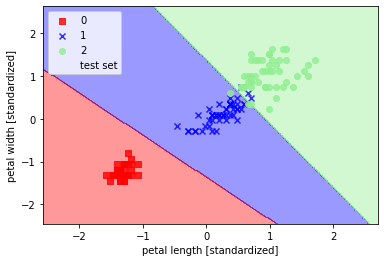

In [26]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=1000.0, random_state=0, solver="lbfgs", multi_class="auto")
lr.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined, classifier=lr, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

In [27]:
print("Classes",lr.classes_)
lr.predict_proba(X_test_std)

Classes [0 1 2]


array([[6.51335792e-16, 4.95077314e-04, 9.99504923e-01],
       [1.32640538e-04, 9.99818817e-01, 4.85423440e-05],
       [9.99948083e-01, 5.19168039e-05, 2.89755641e-18],
       [3.79330985e-16, 1.18063223e-04, 9.99881937e-01],
       [9.99921056e-01, 7.89436666e-05, 7.52757094e-18],
       [1.95972890e-20, 1.73749925e-06, 9.99998263e-01],
       [9.99908391e-01, 9.16094804e-05, 6.87845585e-18],
       [4.47997927e-08, 8.83125850e-01, 1.16874105e-01],
       [8.14992933e-08, 9.10438731e-01, 8.95611875e-02],
       [6.86252027e-06, 9.99403940e-01, 5.89197752e-04],
       [3.84627242e-10, 1.22830323e-01, 8.77169677e-01],
       [1.12211798e-07, 9.56627690e-01, 4.33721973e-02],
       [9.69522133e-07, 9.89217832e-01, 1.07811987e-02],
       [7.15933975e-08, 9.28107927e-01, 7.18920010e-02],
       [1.28709854e-07, 9.45556739e-01, 5.44431319e-02],
       [9.99980651e-01, 1.93486780e-05, 4.69823844e-19],
       [1.12211798e-07, 9.56627690e-01, 4.33721973e-02],
       [3.43858267e-06, 9.97815

# 1.3 Support Vector Machines

<ipython-input-21-8d5f77720a28>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


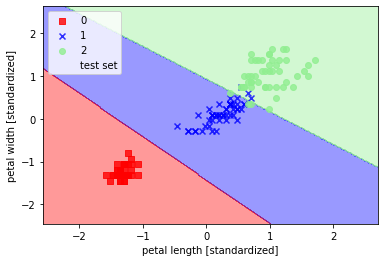

In [33]:
from sklearn.svm import SVC
svm = SVC(kernel='linear', C=1.0, random_state=0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
y_combined, classifier=svm,
test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

### Logistic regression vs SVM

ในทางปฎิบัติสำหรับงาน classification นั้น Logistic regression และ SVM ให้ผลลัพธ์ที่คล้ายคลึงกันแต่เนื่องจาก 
Logistic regression พยาม maximize conditional likelihoods จาก training data จึงทำให้มีแนวโน้ม sensitive กับ outliers มากกว่า SVM 
เพราะ SVM สนใจ data point ที่ใกล้กับ decision boundary (support vectors) เป็นหลักจึงไม่ sensitive กับ outliers มากนัก

อย่างไรก็ตาม Logistic regression ก็มีข้อดีด้านอื่นเช่นเป็น model ที่เรียบง่ายกว่า SVM ทำให้ง่ายในการ implements มากกว่าทั้งยังสามารถอัพเดตง่ายกว่าจึงเหมาะสมกับ streaming data เป็นต้น

## 1.4 Solving "Nonlinear" problems using a kernel SVM (XOR Gate Problem)

#### References:
#### https://scikit-learn.org/stable/modules/svm.html
#### https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html
#### https://scikit-learn.org/stable/modules/mixture.html
#### https://en.wikipedia.org/wiki/Normal_distribution
#### https://en.wikipedia.org/wiki/Radial_basis_function
(Radial basis functions are typically used to build up function approximations of the form)

เหตุผลหนึ่งที่ SVM ได้รับความนิยมใน ML application คือความสามารถในการปรับ kernel เพื่อแก้ปัญหาที่เป็น non-linear classification ได้

ยกตัวอย่างการแก้ปัญหา XOR gate ดังนี้

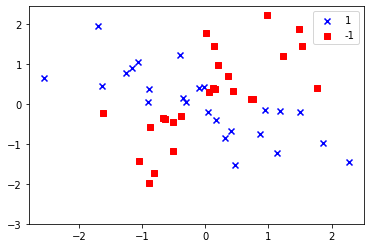

In [40]:
np.random.seed(0)
X_xor = np.random.randn(50, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0, X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)
plt.scatter(X_xor[y_xor==1, 0], X_xor[y_xor==1, 1],
c='b', marker='x', label='1')
plt.scatter(X_xor[y_xor==-1, 0], X_xor[y_xor==-1, 1],
c='r', marker='s', label='-1')
plt.ylim(-3.0)
plt.legend()
plt.show()
positions = X_xor
groups = y_xor

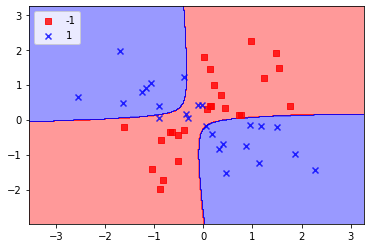

In [41]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.1, C=10.0)
svm.fit(positions, groups)
plot_decision_regions(positions, groups, classifier=svm)
plt.legend(loc='upper left')
plt.show()

gamma = 0.1 คือ cut-off parameter ของ Gaussian sphere ซึ่งถ้าเราเพิ่มค่า gamma จะเป็นการเพิ่มอิทธิผลของตัวอย่างข้อมูลซึ่งจะนำไปสู่
decision boundary ที่ soft ลง

ต่อไปจะเป็นตัวอย่างการประยุกต์ใช้ RBF (Radial Basis Function) kernel SVM กับชุดข้อมูล iris data set

<ipython-input-21-8d5f77720a28>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


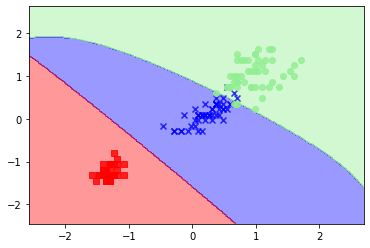

In [42]:
svm = SVC(kernel='rbf', random_state=0, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,y_combined, classifier=svm, test_idx=range(105,150))

<ipython-input-21-8d5f77720a28>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


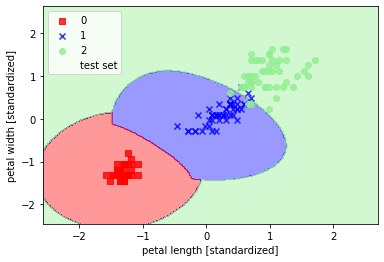

In [45]:
svm = SVC(kernel='rbf', random_state=0, gamma=1.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
y_combined, classifier=svm,
test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

<ipython-input-21-8d5f77720a28>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


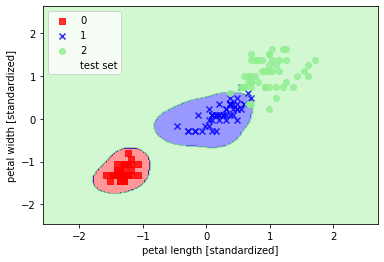

In [46]:
svm = SVC(kernel='rbf', random_state=1, gamma=10.0, C=1.0)
svm.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std,
y_combined, classifier=svm,
test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.show()

# 1.5 Decision Tree Learning

### สร้างต้นไม้การตัดสินใจ (Decision Tree)

Decision Tree สามารถสร้างขอบเขตการตัดสินใจที่ซับซ้อนได้ (complex decision boundaries) โดยการแบ่ง features spaces ออกในรูปของสี่เหลี่ยมผืนผ้า
เราสามารถสร้างต้นไม้การตัดสินใจหลายชั้นลึกได้แต่ต้องระวังจะเกิดการ overfitting ขึ้นซึ่งต้องพิจารณาความเหมาะสม ในที่นี้จะใช้ maximum depth ที่ 3 ชั้น

<ipython-input-21-8d5f77720a28>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


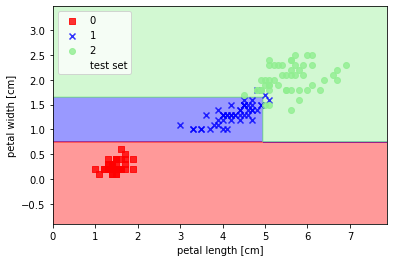

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X_combined, y_combined,
classifier=tree, test_idx=range(105,150))
plt.xlabel('petal length [cm]')
plt.ylabel('petal width [cm]')
plt.legend(loc='upper left')
plt.show()

## 1.6 Random Forests

Random forests ได้รับความนิยมเนื่องจากประสิทธิภาพที่ดี scalability และความง่ายในการใช้งาน
เราสามารถมองว่า Random forests คือการผสมชุดของ decision trees หลายๆอันด้วยหลักการที่เรียกว่า "Ensemble Learning" 
(https://en.wikipedia.org/wiki/Ensemble_learning) ซึ่งเป็นการผสม weak learners เพื่อสร้าง robust model ซึ่งก็คือ strong learner นั่นเอง
ผลลัพธ์ที่ได้จะเป็น model ที่แม่นยำขึ้นและ overfitting น้อยลง

Random Forests มีการทำงานหลักๆ 4 ขั้นคือ
1. สร้าง Random bootstrap ตัวอย่างจำนวน n ตัว (สุ่มเลือก n ตัวอย่างจาก training set แบบแทนที่*)
2. สร้าง Decision tree จาก bootstrap sample, ในแต่ละ node:
     2.1 สุ่มเลือก d features แบบไม่แทนที่*
     2.2 Split node โดยใช้ features ที่ให้ผล split ที่ดีที่สุดโดยพิจารณาจาก objective function เช่น การ maximize information gain*
3. ทำซ้ำขั้นตอนที่ 1 และ 2 k ครั้ง
4. รวบรวมผล prediction แต่ละ tree เพื่อ assign class label ด้วยวิธี majority vote

Ref https://en.wikipedia.org/wiki/Information_gain_in_decision_trees

<ipython-input-21-8d5f77720a28>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


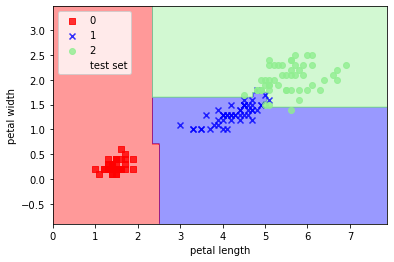

In [57]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(criterion='entropy',
n_estimators=10,
random_state=1,
n_jobs=7)
forest.fit(X_train, y_train)
plot_decision_regions(X_combined, y_combined,
classifier=forest, test_idx=range(105,150))
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

## 1.7 K-nearest neighbors

K-nearest neighbors แตกต่างจาก learning algorithms ก่อนหน้าตรงที่ algorithm นี้ไม่ได้ learning discriminative function แต่ "จดจำ training data set" แทน

### Parametric vs Non-Parametric models

Machine Learning algorithm สามารถแบ่งออกเป็น 2 ประเภทคือ Parametric และ Non-Parametric models

Parametric model: เป็นการประมาณการ parameters จาก training data set เพื่อ learn function ที่สามารถแบ่งกลุ่ม (classified) ชุดข้อมูล data set ใหม่ๆได้โดยไม่ต้องใช้ชุดข้อมูลเดิม เช่น Perceptron, Logistic Regression และ SVM เป็นต้น

Non-Parametric model: ไม่ใช่การระบุคุณลักษณะด้วยจำนวน parametersที่แน่นอนและจำนวนของ parameters จะเพิ่มขึ้นตามขนาดของ training data
เช่น Decision tree/random forests และ kernel SVM เป็นต้น

KNN อยู่ในกลุ่มย่อยของ non-parametric model เรียกว่า "Instance-based learning" model ชนิดนี้จะจดจำ training data set

KNN algorithm มีขั้นตอนการทำงานดังนี้
1. เลือกจำนวน K และ distance metric
2. หา data points k points ที่ใกล้ที่สุดเพื่อนำมาพิจารณา classify
3. กำหนด class label ให้โดยดูจาก majority vote

ข้อดีของ KNN คือ model จะปรับทันทีที่มีข้อมูลใหม่เข้ามา

ข้อเสียของ KNN คือการเกิด computational complexity เชิงเส้นตามขนาดของข้อมูล
อย่างไรก็ตามสามารถใช้ features selection, dimensionality reduction (LSA,SVD) เข้าช่วยเพื่อลดขนาดข้อมูลได้

<ipython-input-21-8d5f77720a28>:25: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated since 3.2 and will be removed two minor releases later. Use an explicit list instead.
  plt.scatter(X_test[:, 0], X_test[:, 1], c='',


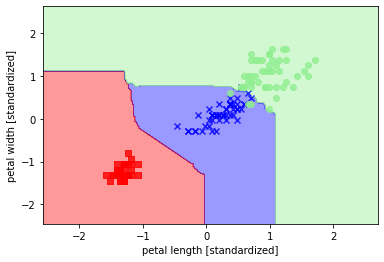

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10, p=1, metric='minkowski')
knn.fit(X_train_std, y_train)
plot_decision_regions(X_combined_std, y_combined,
classifier=knn, test_idx=range(105,150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.show()

## 1.8 Dimensionality Reduction
### ตัวอย่างการใช้ Singular Value Decomposition (SVD) กับโจทย์ Documents Classification

#### References:
#### https://en.wikipedia.org/wiki/Latent_semantic_analysis
#### https://towardsdatascience.com/simple-svd-algorithms-13291ad2eef2
#### https://en.wikipedia.org/wiki/Singular_value_decomposition
#### https://medium.com/swlh/eigenvalues-and-eigenvectors-5fbc8b037eed
#### https://home.kku.ac.th/wattou/teaching/323311/501.pdf 

In [64]:
from numpy import zeros
from scipy.linalg import svd
from matplotlib import pyplot as plt
from matplotlib import cm as CM
from matplotlib import colors
import numpy as np
%matplotlib inline
from math import log
from numpy import asarray, sum

In [65]:
titles = ["10 Best Places to Visit in Spain – Touropia Travel Experts",
          "9 Tips for Traveling in Japan | Fodor's Travel",
          "Places to Visit in Italy | Where to go in Italy | Rough Guides",
          "First Time to Japan 10 Travel Tips to Plan Your Trip. | The Shooting Star",
          "Japan Travel Guide | Fodor's Travel",
"The Neatest Little Guide to Stock Market Investing",
"Investing For Dummies, 4th Edition",
"The Little Book of Common Sense Investing: The Only Way to Guarantee Your Fair Share of Stock Market Returns"]

stopwords = ["and","edition","for","in","little","of","the","to"]
ignorechars = ''',:'!'''

In [66]:
class LSA(object):

    def __init__(self, stopwords, ignorechars):
        self.stopwords = stopwords
        self.ignorechars = ignorechars
        self.wdict = {}
        self.dcount = 0

    def parse(self, doc):
        words = doc.split();
        for w in words:
            w = w.lower().translate(self.ignorechars)
            if w in self.stopwords:
                continue
            elif w in self.wdict:
                self.wdict[w].append(self.dcount)
            else:
                self.wdict[w] = [self.dcount]
        self.dcount += 1

    def build(self):
        self.keys = [k for k in self.wdict.keys() if len(self.wdict[k]) > 1]
        self.keys.sort()
        self.A = zeros([len(self.keys), self.dcount])
        for i, k in enumerate(self.keys):
            for d in self.wdict[k]:
                self.A[i,d] += 1

    def calc(self):
        self.U, self.S, self.Vt = svd(self.A)

    def printA(self):
        print('Here is the count matrix')
        print(self.A)

    def printSVD(self):
        print('Here are the singular values (S)')
        print(self.S)
        print('Here are the first 3 columns of the U matrix (Words)')
        print(-1*self.U[:, 0:3])
        print('Here are the first 3 rows of the Vt matrix (Titles)** (Will be used for classification)')
        print(-1*self.Vt[0:3, :])
        print(self.Vt.shape)
        fig, ax = plt.subplots()
        heatmap = ax.pcolor(-1*self.Vt[0:3, :], cmap=plt.cm.seismic)
        cbar = plt.colorbar(heatmap)
        column_labels = ['', 'Doc1', 'Doc2', 'Doc3', 'Doc4', 'Doc5', 'Doc6','Doc7', 'Doc8', 'Doc9']
        row_labels = ['', '  Dimension1', '', '  Dimension2', '', '  Dimension3']
        ax.set_xticklabels(column_labels, minor=False)
        ax.set_yticklabels(row_labels, minor=False)
        plt.xticks(rotation=90)
        ax = plt.gca()
        plt.show()
        for i in range(0,8):
            if ((-1*self.Vt[1, i])<0) & ((-1*self.Vt[2, i])<0):
                print('Group 1 Doc: ', i,' ',titles[i])
        print("")            
        for i in range(0,8):            
            if ((-1*self.Vt[1, i])>0) & ((-1*self.Vt[2, i])>0):
                print('Group 2 Doc: ', i,' ',titles[i])
        print("")            
        for i in range(0,8):            
            if ((-1*self.Vt[1, i])<0) & ((-1*self.Vt[2, i])>0):
                print('Group 3 Doc: ', i,' ',titles[i])
        print("")            
        for i in range(0,8):            
            if ((-1*self.Vt[1, i])>0) & ((-1*self.Vt[2, i])<0):
                print('Group 4 Doc: ', i,' ',titles[i])       

Here is the count matrix
[[1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0.]
 [0. 0. 2. 0. 0. 0. 0. 0.]
 [0. 1. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 1. 0. 1. 0. 0. 0. 0.]
 [1. 1. 0. 1. 2. 0. 0. 0.]
 [1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 1. 2. 1. 1. 0. 0. 0.]]
Here are the singular values (S)
[4.22114494 2.89857533 2.37724877 1.88442094 1.76695092 1.19576762
 0.82991025 0.58061666]
Here are the first 3 columns of the U matrix (Words)
[[ 0.16823183 -0.03915858  0.02585355]
 [ 0.24127529 -0.19996214  0.07624863]
 [ 0.14487278 -0.16462491 -0.31286141]
 [ 0.01167923 -0.04778897 -0.39726405]
 [ 0.20951841  0.59845221 -0.09391538]
 [ 0.35127582 -0.26999498  0.08891594]
 [ 0.01993505 -0.07065379 -0.56883673]
 [ 0.1629905   0.33010037 -0.03377145]
 [ 0.01993505 -0.07065379 -0.56883673]
 [ 0.21742681 -0.14747105  0.07480921]
 [ 0.54335613 -0.36164465  0.

<ipython-input-66-dc19e06a0ccb>:49: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(column_labels, minor=False)
<ipython-input-66-dc19e06a0ccb>:50: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(row_labels, minor=False)


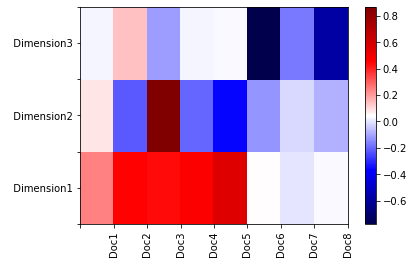

Group 1 Doc:  5   The Neatest Little Guide to Stock Market Investing
Group 1 Doc:  6   Investing For Dummies, 4th Edition
Group 1 Doc:  7   The Little Book of Common Sense Investing: The Only Way to Guarantee Your Fair Share of Stock Market Returns

Group 2 Doc:  0   10 Best Places to Visit in Spain – Touropia Travel Experts

Group 3 Doc:  1   9 Tips for Traveling in Japan | Fodor's Travel
Group 3 Doc:  3   First Time to Japan 10 Travel Tips to Plan Your Trip. | The Shooting Star
Group 3 Doc:  4   Japan Travel Guide | Fodor's Travel

Group 4 Doc:  2   Places to Visit in Italy | Where to go in Italy | Rough Guides


In [67]:
mylsa = LSA(stopwords, ignorechars)
for t in titles:
    mylsa.parse(t)

mylsa.build()
mylsa.printA()
mylsa.calc()
mylsa.printSVD()

# 2. Un-Supervised Learning Algorithms

## 2.1 K-Mean Clustering

Clustering algorithm สามารถนำมาประยุกต์ใช้กับโจทย์ปัญหาทางธุรกิจอย่างเช่นการจัดกลุ่มเอกสาร ดนตรี ภาพยนต์ ตามหัวเรื่องหรือ topics ต่างๆ
รวมถึงการจัดประเภทลูกค้าหรือ users ตามความสนใจประวัติการซื้อของการชำระเงินหรือ user profiles ที่คล้ายกันซึ่งเป็นพื้นฐานของ recommendation engine

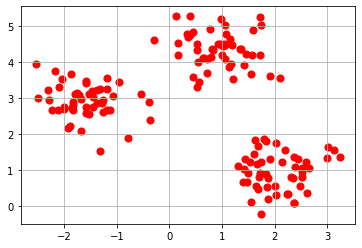

In [68]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=150,
    n_features=2,
    centers=3,
    cluster_std=0.5,
    shuffle=True,
    random_state=0)

plt.scatter(X[:,0], X[:,1],c='Red',marker='o',s=50)

plt.grid()
plt.show()

ชุดข้อมูล (Data set) ที่สร้างขึ้นมาประกอบด้วยข้อมูลสุ่มจำนวน 150 จุดซึ่งถูกจัดกลุ่มอย่างคร่าวๆ 3 กลุ่มและถูก visualize แบบ 2 มิิติ

K-Means Algorithms มีขั้นตอนการทำงานดังนี้
1. สุ่มเลือก centroids จำนวน K จุดจากชุดข้อมูลเพื่อเป็น cluster's initial centroids
2. Assign จุดข้อมูลที่เหลือแต่ละอันให้อยู่ใน centroid(i) ที่ใกล้ที่สุด
3. อัพเดตเลื่อน centroids ให้อยู่ตรงกลางของชุดข้อมูลในกลุ่มนั้นๆ
4. ทำซ้ำข้อ 2 และ 3 กระทั่ง centroid ไม่เลื่อนตำแหน่งอีกต่อไปหรือกระทั่งจำนวนทำซ้ำเท่ากับจำนวนวนรอบสูงสุดที่กำหนดไว้

In [69]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4,
init='random',
n_init=10,
max_iter=300,
tol=1e-04,
random_state=0)
y_km = km.fit_predict(X)

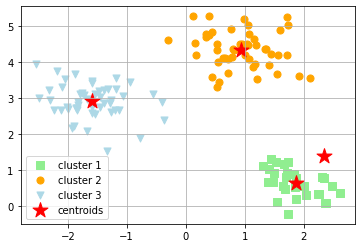

In [70]:
plt.scatter(X[y_km==0,0],
    X[y_km ==0,1],
    s=50,
    c='lightgreen',
    marker='s',
    label='cluster 1')

plt.scatter(X[y_km ==1,0],
    X[y_km ==1,1],
    s=50,
    c='orange',
    marker='o',
    label='cluster 2')

plt.scatter(X[y_km ==2,0],
    X[y_km ==2,1],
    s=50,
    c='lightblue',
    marker='v',
    label='cluster 3')

plt.scatter(km.cluster_centers_[:,0],
    km.cluster_centers_[:,1],
    s=250,
    marker='*',
    c='red',
    label='centroids')

plt.legend()
plt.grid()
plt.show()

### 2.2 Locating regions of high density via DBSCAN

DBScan เป็นการใช้ local regions มาพิจารณาโดยมีขั้นตอนทำงานดังนี้
1. จุดใดๆจะถูกพิจารณาว่าเป็น Core points ถ้ามีจำนวนจุดข้างเคียงที่อยู่ในรัศมี ε มากกว่าหรือเท่ากับตัวเลขเจาะจงค่าๆหนึ่ง (MinPts)
2. จุดใดๆจะถูกพิจารณาว่าเป็น Border points ถ้ามีจำนวนจุดข้างเคียงที่อยู่ในรัศมี ε น้อยกว่าตัวเลขเจาะจงค่าๆหนึ่ง (MinPts)
3. จุดอื่นๆที่เหลือที่ไม่ใช่ Core points และไม่ใช่ Border points ถือเป็น Noise points

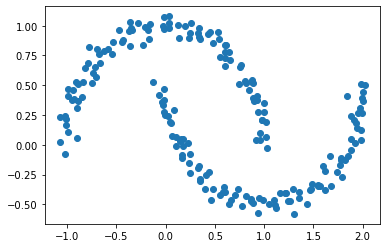

In [71]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200,
    noise=0.05,
    random_state=0)

plt.scatter(X[:,0], X[:,1])
plt.show()

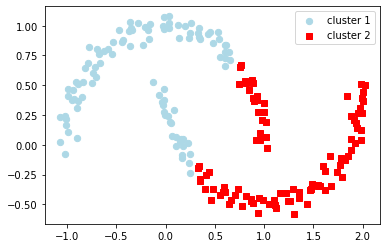

In [72]:
km = KMeans(n_clusters=2,
    random_state=0)

y_km = km.fit_predict(X)

plt.scatter(X[y_km==0,0],
    X[y_km==0,1],
    c='lightblue',
    marker='o',
    s=40,
    label='cluster 1')

plt.scatter(X[y_km==1,0],
    X[y_km==1,1],
    c='red',
    marker='s',
    s=40,
    label='cluster 2')

plt.legend()
plt.show()

ข้อดีของ DBScan คือไม่ assume ว่าวง cluster จะต้องเป็นทรงกลมเท่านั้นเหมือนที่ K-Means assume

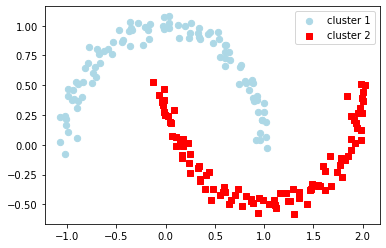

In [73]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2,
    min_samples=5,
    metric='euclidean')

y_db = db.fit_predict(X)

plt.scatter(X[y_db==0,0],
    X[y_db==0,1],
    c='lightblue',
    marker='o',
    s=40,
    label='cluster 1')

plt.scatter(X[y_db==1,0],
    X[y_db==1,1],
    c='red',
    marker='s',
    s=40,
    label='cluster 2')

plt.legend()
plt.show()